# Bootstrap based on amplitude

For bootstrapping on the isolated sounds, a much simpler process is adequate: Separate the background from the speech based on the amplitude in each frame.

A simple amplitude threshold will separate the speech from the background well enough to bootstrap models for most sounds. However, the threshold may need to be different for each sound. In addition, the amplitudes for background and speech may overlap for the quietest speech sounds.

I am attaching a file that recommends smoothing the amplitudes of consecutive frames. I used momentum for smoothing, but any kind of smoothing should do. As you will see in the plots in the attached file, separating speech from background is much easier with the smoothed signal.

credits: https://medium.com/analytics-vidhya/speech-analytics-part-2-sound-analytics-in-torchaudio-7645a3dd192d


In [1]:
!pip3 install torchaudio
!pip install torch
!pip install webrtcvad

     |████████████████████████████████| 1.9MB 15.9MB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72368 sha256=a80e199ff23f01954864c9c4e1e9e8f827b4d69c25b1dcab4a7d88ab1975d5c0
  Stored in directory: /root/.cache/pip/wheels/44/2a/18/bd1aec41cac7c3051fe95d92a6ed446122ea31dc713c432fa1
Successfully built webrtcvad


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

KeyboardInterrupt: ignored

In [15]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
base_path = '/content/gdrive/MyDrive/CMU/11785_Intro_to_Deep_Learning/DL_Group_Project/Dataset/'
folders = [
           'Marta_Recordings',
           'Mansi_Recordings/Complex',
           'Mansi_Recordings/Steady_State',
           'Sreedhar_Recordings',
           'Sreenidhi_Recordings'
]

In [ ]:
folder_index = 0
wav_filename = 'AE.wav'

In [ ]:
recording_path = f'{base_path}{folders[folder_index]}'

In [4]:
'''
#MG: Directly uploaded wav files to validate
recording_path = '/content/'
wav_filename = "Marta_AE.wav"
'''

In [9]:
# load .wav file
wav_path = f'{recording_path}/{wav_filename}'
waveform, sample_rate = torchaudio.load(wav_path)
print(f"Shape of waveform: {waveform.size()}")
print(f"Sample rate of waveform: {sample_rate}")

Shape of waveform: torch.Size([2, 887195])
Sample rate of waveform: 44100


In [10]:
def plot_waveform(waveform, sample_rate, path="/content/", filename="sample", xlim=None, ylim=None):
  title = "Waveform: {}".format(filename)
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)

  fig1 = plt.gcf()
  plt.show(block=False)
  fig1.savefig(f'{path}/{filename}_waveform.png')

In [38]:
def plot_smoothed_waveform(waveform, sample_rate, path="/content/", filename="sample", xlim=None, ylim=None):
  title = "Waveform: {}".format(filename)
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    poly = np.polyfit(time_axis, waveform[c], 3)
    poly_y = np.poly1d(poly)(time_axis)
    axes[c].plot(time_axis, poly_y, linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)

  fig1 = plt.gcf()
  plt.show(block=False)
  fig1.savefig(f'{path}/{filename}_waveform.png')

num channels: 2
num frames: 887195


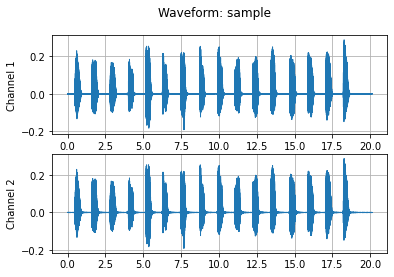

In [12]:
# split .wav into frames
waveform_np = waveform.numpy()
num_channels, num_frames = waveform_np.shape
print(f"num channels: {num_channels}")
print(f"num frames: {num_frames}")

plot_waveform(waveform=waveform, sample_rate=sample_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


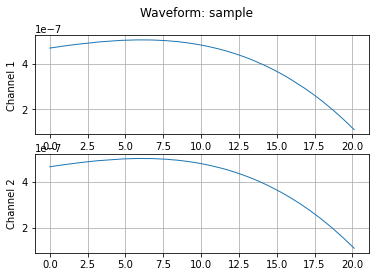

In [39]:
plot_smoothed_waveform(waveform=waveform, sample_rate=sample_rate)

In [32]:

def plot_smoothed2_waveform(waveform, sample_rate, path="/content/", filename="sample", xlim=None, ylim=None):
  from scipy.signal import savgol_filter
  title = "Waveform: {}".format(filename)
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    yhat = savgol_filter(waveform[c], 999, 3) # window size 51, polynomial order 3
    axes[c].plot(time_axis, yhat, linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)

  fig1 = plt.gcf()
  plt.show(block=False)
  fig1.savefig(f'{path}/{filename}_waveform.png')

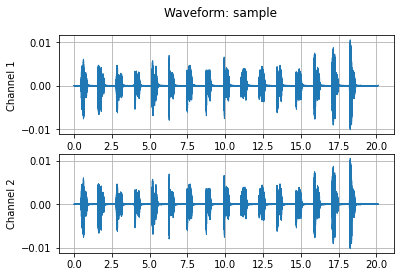

In [33]:
plot_smoothed2_waveform(waveform=waveform, sample_rate=sample_rate)

In [41]:
def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

In [45]:
def plot_smoothed3_waveform(waveform, sample_rate, path="/content/", filename="sample", xlim=None, ylim=None):
  from scipy.signal import savgol_filter
  title = "Waveform: {}".format(filename)
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    yhat = smoothTriangle(waveform[c], 3)
    axes[c].plot(time_axis, yhat, linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)

  fig1 = plt.gcf()
  plt.show(block=False)
  fig1.savefig(f'{path}/{filename}_waveform.png')

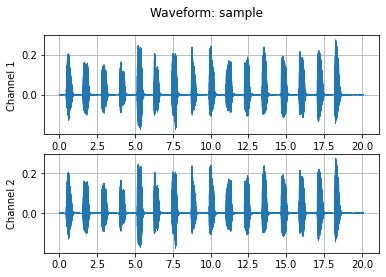

In [46]:
plot_smoothed3_waveform(waveform=waveform, sample_rate=sample_rate)

In [ ]:
# normalize amplitude (-1, 1)
def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()

In [ ]:
waveform_np_norm = normalize(waveform_np)

In [ ]:
# get threshold amplitude for sound

In [ ]:
# label each frame based on amplitude

https://github.com/wiseman/py-webrtcvad

In [ ]:
import webrtcvad
vad = webrtcvad.Vad()

In [ ]:
vad.set_mode(1)

In [ ]:
# TODO: how do we know frame duration???

In [ ]:
# Run the VAD on 10 ms of silence. The result should be False.
sample_rate = 16000
frame_duration = 10  # ms
frame = b'\x00\x00' * int(sample_rate * frame_duration / 1000)
print 'Contains speech: %s' % (vad.is_speech(frame, sample_rate)

## Histogram of frame amplitude

In [ ]:
def histogram_frame_amplitude():
  pass

In [ ]:
def histogram_frame_amplitude_vs_time():
  pass

  